In [1]:
import LLMSR
import openai

import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

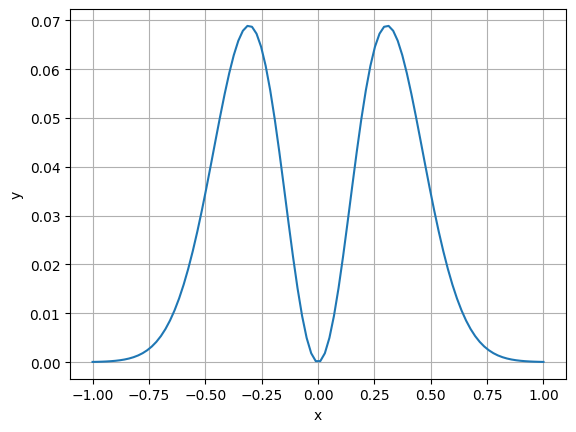

In [3]:
x = np.linspace(-1, 1, 100)
y = x*np.sin(2*x)*np.exp(-10 * x**2)
#y = np.pi*np.ones(100)

plt.plot(x, y,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
#plt.legend()
plt.savefig('plot.png')

# Getting the Base64 string
base64_image = LLMSR.encode_image('plot.png')

In [ ]:
r = LLMSR.single_call(client, base64_image, x, y, model="openai/gpt-4o",function_list=None, system_prompt=None)
print(r)

pop_size = 10 and num_of_generations = 5 will cost about $0.10 on 4o-mini

In [ ]:
population_size = 10
num_of_generations = 5
start = LLMSR.check_key_limit(client)
res = LLMSR.run_genetic(client, base64_image, x, y, population_size,num_of_generations, 
                        temperature=1., model="openai/gpt-4o", system_prompt=None, elite=False)
print(f"Credits spent: {start - LLMSR.check_key_limit(client)}")

Checking constant function
Constant function is not a good fit.
Score:  0.9783405486550204
Constant:  [0.0251029]
Generating Initial population population


 10%|█         | 1/10 [00:02<00:20,  2.31s/it]/Users/trharvey/llm/lib/python3.13/site-packages/LLMSR/llmSR.py:88: OptimizeWarning: Covariance of the parameters could not be estimated
  params_opt, _ = curve_fit(curve, x, y, p0=params_initial)
100%|██████████| 10/10 [00:30<00:00,  3.05s/it]


Best score:  -0.45526772435200924
Best ansatz:   params[0] * np.exp(-((x - params[1])**2) / params[2]) + params[3] * np.exp(-((x - params[4])**2) / params[5])
Best params:  [-5.20404645e-01  1.94516828e-03 -1.33219459e+01  5.63860905e-01
 -5.73351562e-03  3.99953046e+01]
Generation: 1


100%|██████████| 10/10 [00:42<00:00,  4.28s/it]


Best score:  -0.453668676096228
Best ansatz:   params[0] * np.exp(-((x - params[1])**2) / params[2]) + params[3] * np.exp(-((x - params[1])**2) / params[4])
Best params:  [-1.02016205e+01 -7.50848076e-06 -3.03239597e+02  1.02451933e+01
  4.96155789e+02]
Generation: 2


 40%|████      | 4/10 [00:26<00:39,  6.51s/it]


KeyboardInterrupt: 

In [ ]:
len(res[0])

10

In [ ]:
highest_score_element = max((item for sublist in res for item in sublist), key=lambda item: item['score'])
print(highest_score_element['ansatz'])

 params[0] * np.exp(-params[1] * x**2) * np.sin(params[2] * x)**2


In [ ]:
print(highest_score_element['function_list'])

[' params[0] * np.exp(-params[1] * x**2) * np.cos(params[2] * x)**2', ' params[0] * np.exp(-params[1] * x**2) * (np.cos(params[2] * x) ** 2)']


TypeError: 'numpy.ndarray' object is not callable

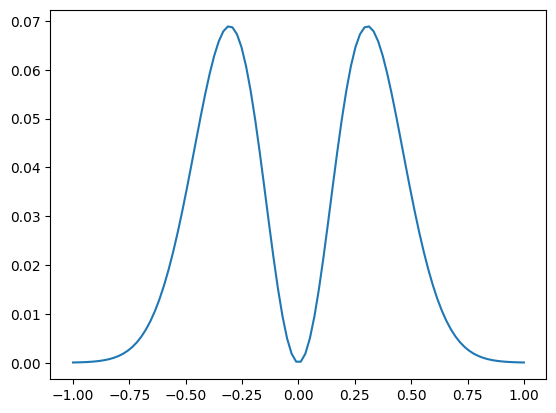

In [ ]:
# Extract the parameters and the ansatz function from the highest_score_element
params = highest_score_element['params']
ansatz = highest_score_element['ansatz']

# Define the ansatz function
def ansatz_function(x, params):
    return eval(ansatz)(x, *params)

# Plot the original data
plt.plot(x, y, label='Original Data')

# Plot the highest score element
plt.plot(x, ansatz_function(x, params), label='Highest Score Element', linestyle='--')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

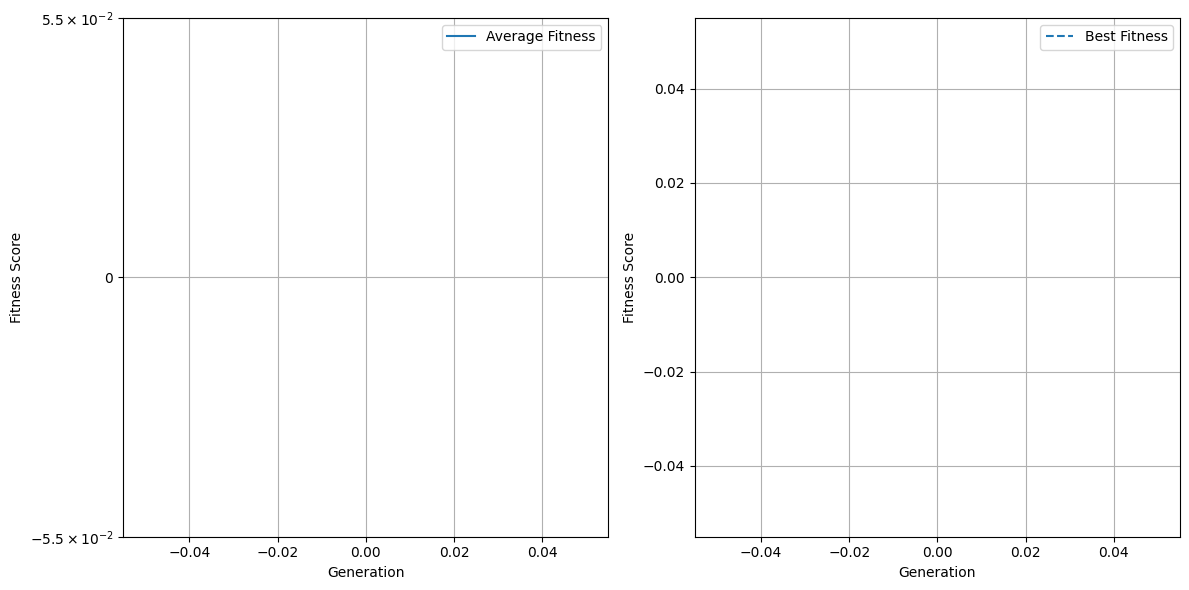

In [ ]:
# Remove infinite scores
filtered_res = [[ind for ind in generation if np.isfinite(ind['score'])] for generation in res]

# Extract fitness scores from the filtered results
average_fitness = [np.mean([ind['score'] for ind in generation]) for generation in filtered_res]
best_fitness = [max([ind['score'] for ind in generation]) for generation in filtered_res]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the average fitness
axs[0].plot(range(len(average_fitness)), average_fitness, label='Average Fitness')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Fitness Score')
axs[0].set_yscale('symlog')
axs[0].legend()
axs[0].grid(True)

# Plot the best fitness
axs[1].plot(range(len(average_fitness)), best_fitness, label='Best Fitness', linestyle='--')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Fitness Score')
axs[1].legend()
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()